<a href="https://colab.research.google.com/github/diezeJhon/kaggle/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import sys
import os
# Define the base path depending on the environment
nameCompetition = "playground-series-s4e12"
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = "/content/drive/MyDrive/data/kaggle/" + nameCompetition
    print("Google Colab detected. Base path set to:", base_path)
    !pip install optuna
    !pip install catboost

elif "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    base_path = "/kaggle/input/" + nameCompetition
    print("Kaggle environment detected. Base path set to:", base_path)
else:
    base_path = "/mnt/g/Mon Drive/data/kaggle/" + nameCompetition
    print("Local environment detected. Base path set to:", base_path)
# List all files in the base path directory
if os.path.exists(base_path):
    print(f"Contents of the directory '{base_path}':")
    for dirname, _, filenames in os.walk(base_path):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print(f"The directory '{base_path}' does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Colab detected. Base path set to: /content/drive/MyDrive/data/kaggle/playground-series-s4e12
Contents of the directory '/content/drive/MyDrive/data/kaggle/playground-series-s4e12':
/content/drive/MyDrive/data/kaggle/playground-series-s4e12/train.csv
/content/drive/MyDrive/data/kaggle/playground-series-s4e12/test.csv
/content/drive/MyDrive/data/kaggle/playground-series-s4e12/sample_submission.csv


In [32]:
df_train = pd.read_csv(base_path + "/train.csv",index_col="id")
df_test = pd.read_csv(base_path + "/test.csv",index_col="id")
sample_submission = pd.read_csv(base_path + "/sample_submission.csv",index_col="id")

In [33]:
df_train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [34]:
df_test

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment


# Context

Inspiration :

https://www.kaggle.com/code/cdeotte/metric-rsmle-vs-rsme-vs-mse-vs-mae

https://www.kaggle.com/code/ultimatemagic79/ps4e12-locket-start-eda-catboost-pv-1-0472#6.-%F0%9F%90%88Model-Training

https://www.kaggle.com/code/radwankhondokar/insurance-premium-prediction


# EDA

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

In [36]:
df_train_target = df_train["Premium Amount"]
df_train = df_train.drop("Premium Amount", axis=1)
# separate numerical columns
num_cols = df_train.select_dtypes(include=np.number)
# separate categorical columns
cat_cols = df_train.select_dtypes(exclude=np.number)

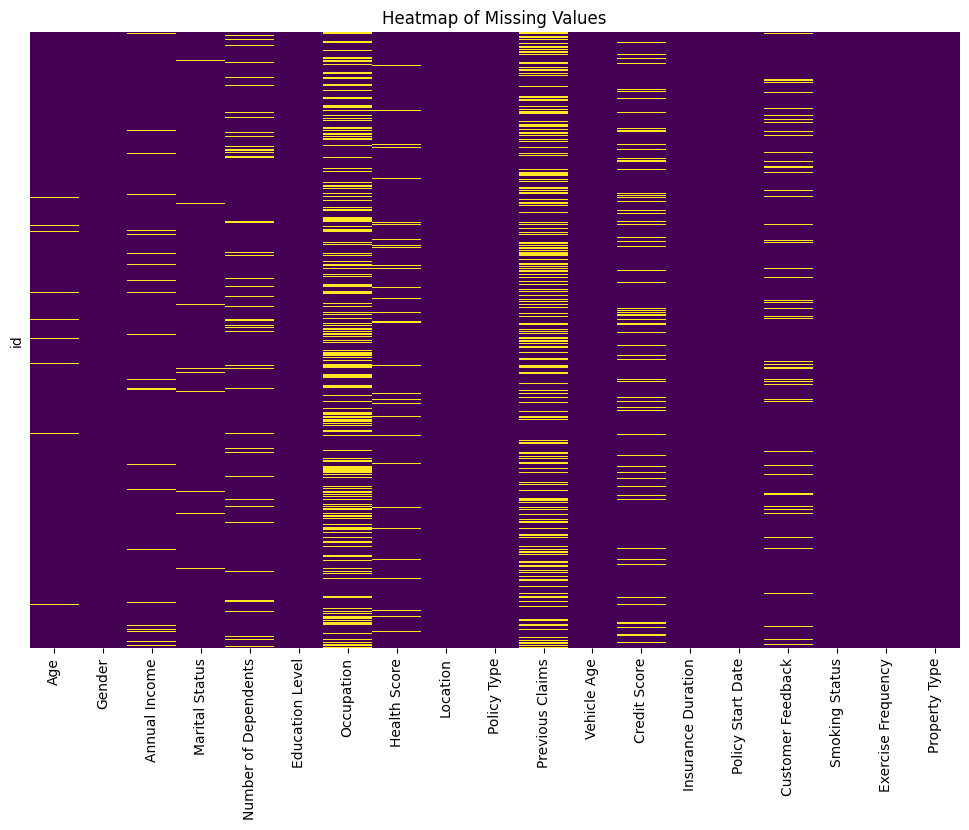

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
# Create a heatmap to visualize null values
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.show()

# preprocessing

# Data Preprocessing Pipeline

This code defines a preprocessing pipeline for cleaning and preparing the dataset before training a machine learning model. The pipeline consists of several custom transformers, each focusing on specific preprocessing tasks. Below is an explanation of each component:

## 1. **DateTransformer**
- Extracts features from the `Policy Start Date` column, such as:
  - Year, Month, Day, Week, Day of the week, and Month name.
  - Cyclical features for Year, Month, and Day using sine (`sin`) and cosine (`cos`) transformations.
- Creates a grouping feature based on year, month, and day.
- Removes the original `Policy Start Date` column after transformation.

## 2. **ContractLengthTransformer**
- Creates a new feature, `contract length`, by binning the `Insurance Duration` into three categories:
  - Short-term (≤1 year), Mid-term (2–3 years), and Long-term (>3 years).
- Handles missing values by assigning them to a default category.

## 3. **MissingValueTransformer**
- Imputes missing numerical values with statistical measures:
  - Mean for most numerical features.
  - Median for `Credit Score` and `Vehicle Age`.
  - Zero for `Number of Dependents` and `Previous Claims`.
- Fills missing categorical values with the most frequent value (mode).
- Handles specific categorical columns like `Marital Status`, `Occupation`, and `Customer Feedback`.

## 4. **CategoricalTransformer**
- Converts all object-type columns into categorical data types, enabling better handling by machine learning models.

## 5. **Pipeline Integration**
- The transformers are combined into a `Pipeline` object, which ensures that all preprocessing steps are applied in sequence.
- The pipeline is fitted to the training dataset (`df_train`) and transformed versions of both the training and test datasets are produced.

### Key Benefits:
- **Modular Design**: Each preprocessing step is encapsulated in a separate transformer, making the pipeline modular and reusable.
- **Automated Handling**: Automatically processes dates, handles missing values, and prepares categorical features.
- **Consistency**: Ensures consistent transformations between training and test datasets.

By using this pipeline, we ensure the dataset is clean, features are well-engineered, and ready for model training.


In [38]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Transformer for handling dates
class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Policy Start Date'] = pd.to_datetime(X['Policy Start Date'], errors='coerce')
        X['Year'] = X['Policy Start Date'].dt.year
        X['Day'] = X['Policy Start Date'].dt.day
        X['Month'] = X['Policy Start Date'].dt.month
        X['Month_name'] = X['Policy Start Date'].dt.month_name()
        X['Day_of_week'] = X['Policy Start Date'].dt.day_name()
        X['Week'] = X['Policy Start Date'].dt.isocalendar().week
        min_year = X['Year'].min()
        max_year = X['Year'].max()
        X['Year_sin'] = np.sin(2 * np.pi * (X['Year'] - min_year) / (max_year - min_year))
        X['Year_cos'] = np.cos(2 * np.pi * (X['Year'] - min_year) / (max_year - min_year))
        X['Month_sin'] = np.sin(2 * np.pi * X['Month'] / 12)
        X['Month_cos'] = np.cos(2 * np.pi * X['Month'] / 12)
        X['Day_sin'] = np.sin(2 * np.pi * X['Day'] / 31)
        X['Day_cos'] = np.cos(2 * np.pi * X['Day'] / 31)
        X['Group'] = (X['Year'] - 2020) * 48 + X['Month'] * 4 + X['Day'] // 7
        X = X.drop('Policy Start Date', axis=1)
        return X

# Transformer for creating contract length variable
class ContractLengthTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['contract length'] = pd.cut(
            X["Insurance Duration"].fillna(99),
            bins=[-float('inf'), 1, 3, float('inf')],
            labels=[0, 1, 2]
        ).astype(int)
        return X

# Transformer for handling missing values and domain-specific preprocessing
class MissingValueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Impute missing numerical values
        X['Age'] = X['Age'].fillna(X['Age'].mean())
        X['Annual Income'] = X['Annual Income'].fillna(X['Annual Income'].mean())
        X['Health Score'] = X['Health Score'].fillna(X['Health Score'].mean())
        X['Credit Score'] = X['Credit Score'].fillna(X['Credit Score'].median())
        X['Vehicle Age'] = X['Vehicle Age'].fillna(X['Vehicle Age'].median())
        X['Number of Dependents'] = X['Number of Dependents'].fillna(0)
        X['Previous Claims'] = X['Previous Claims'].fillna(0)

        # Impute missing categorical values
        X['Marital Status'] = X['Marital Status'].fillna(X['Marital Status'].mode()[0])
        X['Occupation'] = X['Occupation'].fillna(X['Occupation'].mode()[0])
        X['Customer Feedback'] = X['Customer Feedback'].fillna('Good')
        return X

# Transformer for handling categorical variables
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cat_columns = None

    def fit(self, X, y=None):
        self.cat_columns = [col for col in X.columns if X[col].dtype == 'object']
        return self

    def transform(self, X):
        X = X.copy()
        for c in self.cat_columns:
            X[c] = X[c].astype('category')
        return X

# Create the preprocessing pipeline
cleaning_pipeline = Pipeline([
    ('date_transformer', DateTransformer()),
    ('contract_length_transformer', ContractLengthTransformer()),
    ('missing_value_transformer', MissingValueTransformer()),
    ('categorical_transformer', CategoricalTransformer())
])

# Ajuster le pipeline aux données d'entraînement
train = cleaning_pipeline.fit_transform(df_train)
test = cleaning_pipeline.transform(df_test)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# Model

# CatBoost with Optuna for Hyperparameter Optimization

This code trains a **CatBoostRegressor** model using **K-Fold Cross-Validation** and optimizes its hyperparameters with **Optuna**.

---

## Key Concepts

### RMSLE Metric
The evaluation metric is **Root Mean Squared Log Error (RMSLE)**, which is effective for datasets with a wide range of target values. It penalizes larger errors more significantly.

---

### Optuna
**Optuna** is a framework for hyperparameter optimization that efficiently searches for the best parameters using algorithms like **Tree-Structured Parzen Estimator (TPE)**.

- **Benefits of Optuna**:
  - Automatically identifies the best hyperparameters.
  - Fast and flexible optimization.
  - Reduces the trial-and-error process.

---

### K-Fold Cross-Validation
- The data is split into **5 folds** to ensure robust evaluation.
- Each fold is used as a validation set while training on the others.
- This approach helps avoid overfitting and ensures the model generalizes well.

---

## Process Overview

1. **Hyperparameter Optimization**:
   - Optuna searches for the best parameters, such as learning rate, tree depth, and regularization.

2. **Final Model Training**:
   - Train models on each fold using the best parameters.
   - Store the models for predictions.

3. **Ensembling**:
   - Make predictions on the test set using all models.
   - Average the predictions for the final result.

4. **Submission**:
   - Save the predictions in a CSV file for submission.


In [39]:
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
import optuna

# Function to calculate RMSLE (Root Mean Squared Log Error)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Define categorical columns for CatBoost
cat_features = [train.columns.get_loc(col) for col in train.columns if train[col].dtype == 'category']

# Objective function for Optuna hyperparameter optimization
def objective(trial):
    # Hyperparameters to optimize
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'loss_function': 'RMSE',
        'task_type': 'GPU',
        'random_seed': 42,
        'max_bin': 128,  # Speed optimization for GPU
        'boosting_type': 'Plain',
    }

    # 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmsle_scores = []

    for train_idx, val_idx in kf.split(train):
        # Split train data into training and validation sets
        X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
        y_train, y_val = df_train_target.iloc[train_idx], df_train_target.iloc[val_idx]

        # Apply log1p() transformation to the target variable
        y_train_log = np.log1p(y_train)
        y_val_log = np.log1p(y_val)

        # Train CatBoost model
        model = CatBoostRegressor(**params, verbose=0)
        model.fit(X_train, y_train_log, eval_set=(X_val, y_val_log), cat_features=cat_features, early_stopping_rounds=50)

        # Predict on validation set
        val_preds_log = model.predict(X_val)
        val_preds = np.expm1(val_preds_log)  # Inverse log1p transformation
        val_preds = np.clip(val_preds, a_min=0, a_max=None)  # Prevent negative predictions

        # Calculate RMSLE for the validation set
        rmsle_scores.append(rmsle(y_val, val_preds))

    # Return the average RMSLE across folds
    return np.mean(rmsle_scores)

# Hyperparameter optimization with Optuna
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=30, timeout=900)  # Limit to 30 trials or 15 minutes

# Retrieve best parameters from Optuna
best_params = study.best_params
best_params.update({
    'loss_function': 'RMSE',
    'task_type': 'GPU',
    'random_seed': 42,
    'max_bin': 128,
    'boosting_type': 'Plain'
})
print("Best parameters:", best_params)

# Final training with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = []

for train_idx, val_idx in kf.split(train):
    # Split train data into training and validation sets
    X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
    y_train, y_val = df_train_target.iloc[train_idx], df_train_target.iloc[val_idx]

    # Apply log1p() transformation to the target variable
    y_train_log = np.log1p(y_train)

    # Train the final CatBoost model
    model = CatBoostRegressor(**best_params)
    model.fit(X_train, y_train_log, cat_features=cat_features, verbose=200)
    models.append(model)

# Make predictions on the test set by averaging models
test_preds_list = []
for model in models:
    test_preds_log = model.predict(test)  # Predictions in log scale
    test_preds = np.expm1(test_preds_log)  # Inverse log1p transformation
    test_preds = np.clip(test_preds, a_min=0, a_max=None)  # Prevent negative predictions
    test_preds_list.append(test_preds)

# Final predictions by averaging across all models
test_preds_final = np.mean(test_preds_list, axis=0)

# Update the submission DataFrame
sample_submission['Premium Amount'] = test_preds_final

# Save the submission file
submission_path = './submission.csv'
sample_submission.reset_index(inplace=True)
sample_submission.to_csv(submission_path, index=False)

print(f"Submission file saved: {submission_path}")


[I 2024-12-31 12:54:18,810] A new study created in memory with name: no-name-e1beb2bd-2a38-477d-832c-38fb33310d7e
[I 2024-12-31 12:54:59,839] Trial 0 finished with value: 1.0553492048032267 and parameters: {'iterations': 301, 'learning_rate': 0.10220544760086768, 'depth': 4, 'l2_leaf_reg': 0.3896570504678719, 'bagging_temperature': 0.5869370869676179}. Best is trial 0 with value: 1.0553492048032267.
[I 2024-12-31 12:55:52,246] Trial 1 finished with value: 1.0529150897797142 and parameters: {'iterations': 432, 'learning_rate': 0.17372388676731035, 'depth': 7, 'l2_leaf_reg': 0.40679198926156307, 'bagging_temperature': 0.7876057678987662}. Best is trial 1 with value: 1.0529150897797142.
[I 2024-12-31 12:56:27,781] Trial 2 finished with value: 1.0551712014056194 and parameters: {'iterations': 215, 'learning_rate': 0.18897280078293138, 'depth': 4, 'l2_leaf_reg': 1.5189890966754547, 'bagging_temperature': 0.5688045302463959}. Best is trial 1 with value: 1.0529150897797142.
[I 2024-12-31 12:5

Best parameters: {'iterations': 385, 'learning_rate': 0.07951795222810905, 'depth': 9, 'l2_leaf_reg': 3.281663409816511, 'bagging_temperature': 0.02571477777150588, 'loss_function': 'RMSE', 'task_type': 'GPU', 'random_seed': 42, 'max_bin': 128, 'boosting_type': 'Plain'}
0:	learn: 1.0909121	total: 50.6ms	remaining: 19.4s
200:	learn: 1.0486081	total: 8.56s	remaining: 7.83s
384:	learn: 1.0437027	total: 16.6s	remaining: 0us
0:	learn: 1.0913546	total: 50ms	remaining: 19.2s
200:	learn: 1.0487866	total: 8.59s	remaining: 7.86s
384:	learn: 1.0438355	total: 16.6s	remaining: 0us
0:	learn: 1.0913546	total: 50.5ms	remaining: 19.4s
200:	learn: 1.0485818	total: 8.64s	remaining: 7.91s
384:	learn: 1.0436358	total: 16.7s	remaining: 0us
0:	learn: 1.0911422	total: 50.7ms	remaining: 19.5s
200:	learn: 1.0489132	total: 8.59s	remaining: 7.86s
384:	learn: 1.0436737	total: 16.6s	remaining: 0us
0:	learn: 1.0908478	total: 49.8ms	remaining: 19.1s
200:	learn: 1.0486746	total: 8.69s	remaining: 7.96s
384:	learn: 1.04